In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train=pd.read_csv("train.csv")
train.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [3]:
data=pd.read_csv("data.csv")
data.columns

Index(['Unnamed: 0', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE',
       'QeA', 'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE',
       'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE',
       'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE',
       'QtA', 'QtE', 'age_group', 'education', 'engnat', 'familysize',
       'gender', 'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03',
       'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [4]:
married_gender=train.groupby(['married', 'gender'])['voted'].value_counts().unstack()
married_gender

voted              1      2
married gender             
0       Female    15     30
        Male      15     33
1       Female  4971   8845
        Male    6716  11018
2       Female  3359   1603
        Male    3346   1751
3       Female  1469   1023
        Male     743    595

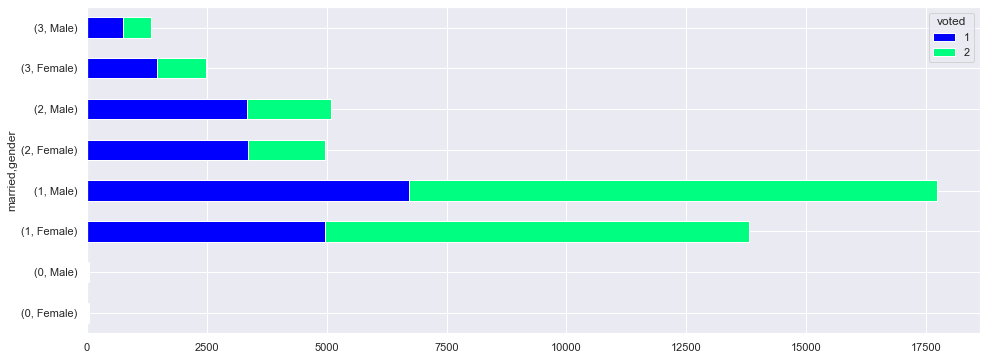

In [5]:
married_gender.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

0 : other                 == voted1 < voted2

1 : Never married         == voted1 < voted2  

2 : Currently married     == voted1 > voted2

3 : Previously married    == voted1 > voted2

In [6]:
married_age=train.groupby(['married', 'age_group'])['voted'].value_counts().unstack()
married_age

voted                   1        2
married age_group                 
0       10s           3.0     37.0
        20s           8.0     11.0
        30s           6.0      4.0
        40s           7.0      9.0
        50s           2.0      2.0
        60s           4.0      NaN
1       +70s          8.0      6.0
        10s        2279.0  11796.0
        20s        6462.0   5855.0
        30s        1990.0   1549.0
        40s         643.0    443.0
        50s         231.0    176.0
        60s          74.0     38.0
2       +70s        103.0     33.0
        10s          24.0     49.0
        20s         896.0    599.0
        30s        2096.0   1200.0
        40s        1921.0    841.0
        50s        1121.0    454.0
        60s         544.0    178.0
3       +70s         62.0     23.0
        10s           8.0     19.0
        20s         118.0    163.0
        30s         522.0    469.0
        40s         672.0    515.0
        50s         582.0    321.0
        60s         248.0    108.0

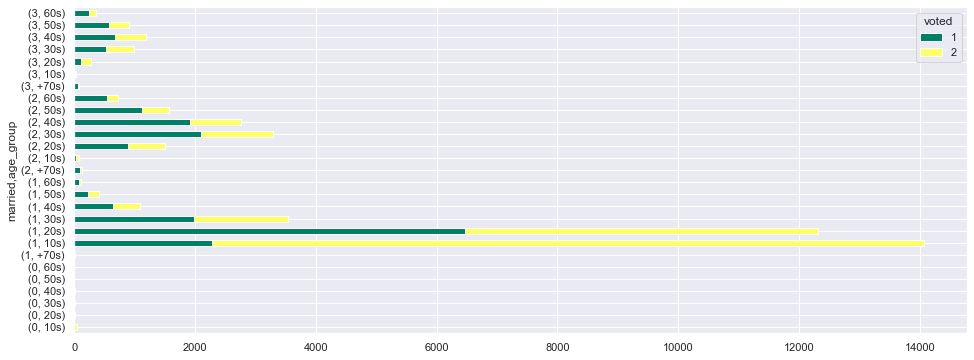

In [7]:
married_age.plot(kind='barh', stacked=True, figsize=[16,6], colormap='summer')

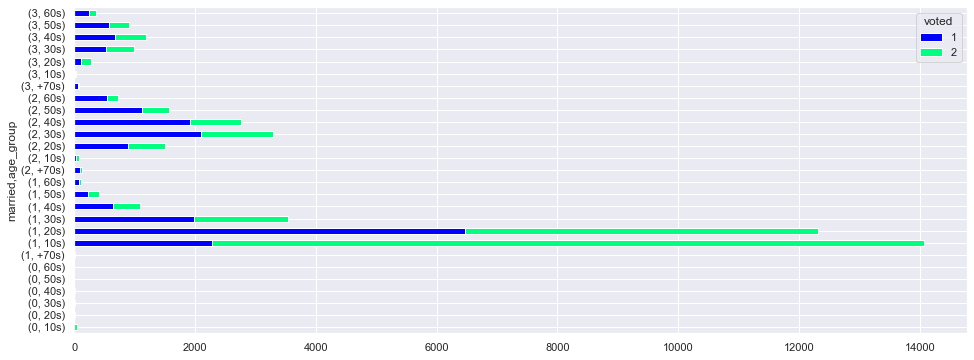

In [8]:
married_age.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

1 : Never married == 10s voted2(x5) / rest voted1

2 : Currently married == 10s voted2(x2) / rest voted1

3 : Previously married == 10s 20s voted2(x2) / rest voted1

In [9]:
data[['tp02','tp04','tp06','tp08','tp10']]= 6-data[['tp02','tp04','tp06','tp08','tp10']]

In [10]:
data['Extraversion']=round((data.tp01+data.tp06)/2)
data['Agreeableness']=round((data.tp02+data.tp07)/2)
data['Conscientiousness']=round((data.tp03+data.tp08)/2)
data['Emotional Stability']=round((data.tp04+data.tp09)/2)
data['Openness to Experiences']=round((data.tp05+data.tp10)/2)

In [11]:
data.groupby(['hand', 'education'])['Extraversion'].value_counts(normalize=True).unstack()

Extraversion         0.0       1.0       2.0       3.0       4.0       5.0  \
hand education                                                               
1    1          0.095220  0.061504  0.213968  0.113005  0.257688  0.095220   
     2          0.087597  0.060065  0.206188  0.113700  0.261417  0.100731   
     3          0.109940  0.067425  0.213353  0.113234  0.251377  0.095749   
     4          0.125071  0.076712  0.215731  0.116726  0.245684  0.088945   
2    1          0.106017  0.073066  0.207736  0.087393  0.230659  0.107450   
     2          0.079858  0.064774  0.186779  0.107365  0.251553  0.115794   
     3          0.085244  0.068295  0.215852  0.124626  0.239282  0.098205   
     4          0.130055  0.078689  0.190164  0.139891  0.254645  0.075410   
3    1          0.118812  0.059406  0.221122  0.102310  0.257426  0.075908   
     2          0.092883  0.051870  0.199035  0.101327  0.295537  0.079614   
     3          0.102389  0.044369  0.213311  0.116041  0.274744  0.104096   
     4          0.111111  0.068100  0.211470  0.143369  0.236559  0.075269   

Extraversion         6.0  
hand education            
1    1          0.163394  
     2          0.170303  
     3          0.148922  
     4          0.131131  
2    1          0.187679  
     2          0.193878  
     3          0.168495  
     4          0.131148  
3    1          0.165017  
     2          0.179735  
     3          0.145051  
     4          0.154122

In [12]:
data.groupby(['hand', 'education'])['Agreeableness'].value_counts(normalize=True).unstack()

Agreeableness        0.0       1.0       2.0       3.0       4.0       5.0  \
hand education                                                               
1    1          0.066136  0.053353  0.300111  0.166543  0.275472  0.060578   
     2          0.095455  0.067978  0.312414  0.159367  0.258889  0.051327   
     3          0.125569  0.081976  0.325569  0.161138  0.228743  0.038323   
     4          0.160398  0.094775  0.328913  0.148965  0.203498  0.036355   
2    1          0.065903  0.063037  0.275072  0.154728  0.292264  0.058739   
     2          0.089618  0.066105  0.300799  0.142857  0.275510  0.057675   
     3          0.100698  0.080758  0.319043  0.160020  0.244766  0.050847   
     4          0.154098  0.084153  0.316940  0.157377  0.218579  0.034973   
3    1          0.046205  0.042904  0.254125  0.141914  0.313531  0.075908   
     2          0.068758  0.068758  0.271411  0.147165  0.268999  0.074789   
     3          0.104096  0.078498  0.303754  0.141638  0.240614  0.066553   
     4          0.114695  0.086022  0.279570  0.175627  0.232975  0.039427   

Agreeableness        6.0  
hand education            
1    1          0.077807  
     2          0.054569  
     3          0.038683  
     4          0.027095  
2    1          0.090258  
     2          0.067436  
     3          0.043868  
     4          0.033880  
3    1          0.125413  
     2          0.100121  
     3          0.064846  
     4          0.071685

In [13]:
data.groupby(['hand', 'education'])['Conscientiousness'].value_counts(normalize=True).unstack()

Conscientiousness       0.0       1.0       2.0       3.0       4.0       5.0  \
hand education                                                                  
1    1             0.147462  0.094479  0.322342  0.130604  0.216191  0.040941   
     2             0.185855  0.103698  0.314722  0.132330  0.188328  0.037973   
     3             0.251078  0.130778  0.309940  0.113653  0.144970  0.025749   
     4             0.314965  0.134903  0.291871  0.100034  0.119012  0.021036   
2    1             0.157593  0.103152  0.313754  0.120344  0.232092  0.035817   
     2             0.181455  0.110027  0.303461  0.123780  0.206300  0.037267   
     3             0.233799  0.122134  0.332502  0.106680  0.150050  0.030409   
     4             0.334426  0.123497  0.298361  0.102732  0.108197  0.017486   
3    1             0.207921  0.092409  0.293729  0.141914  0.178218  0.042904   
     2             0.231604  0.091677  0.318456  0.130277  0.153197  0.034982   
     3             0.276451  0.114334  0.329352  0.102389  0.127986  0.022184   
     4             0.401434  0.100358  0.297491  0.075269  0.103943  0.007168   

Conscientiousness       6.0  
hand education               
1    1             0.047981  
     2             0.037094  
     3             0.023832  
     4             0.018178  
2    1             0.037249  
     2             0.037711  
     3             0.024427  
     4             0.015301  
3    1             0.042904  
     2             0.039807  
     3             0.027304  
     4             0.014337

In [14]:
data.groupby(['hand', 'education'])['Emotional Stability'].value_counts(normalize=True).unstack()

Emotional Stability       0.0       1.0       2.0       3.0       4.0  \
hand education                                                          
1    1               0.133012  0.077251  0.252871  0.113746  0.249352   
     2               0.155520  0.087047  0.246689  0.116723  0.248832   
     3               0.177485  0.101437  0.261497  0.122874  0.229401   
     4               0.201440  0.109066  0.274380  0.118326  0.207728   
2    1               0.121777  0.080229  0.236390  0.108883  0.265043   
     2               0.160160  0.093168  0.248004  0.108696  0.247116   
     3               0.165005  0.105683  0.262712  0.120140  0.230808   
     4               0.194536  0.089617  0.280874  0.130055  0.208743   
3    1               0.178218  0.082508  0.254125  0.108911  0.204620   
     2               0.223160  0.079614  0.231604  0.120627  0.201448   
     3               0.233788  0.122867  0.230375  0.138225  0.184300   
     4               0.297491  0.107527  0.211470  0.121864  0.175627   

Emotional Stability       5.0       6.0  
hand education                           
1    1               0.071878  0.101890  
     2               0.064406  0.080783  
     3               0.049102  0.058204  
     4               0.041957  0.047102  
2    1               0.088825  0.098854  
     2               0.059006  0.083851  
     3               0.053838  0.061815  
     4               0.045902  0.050273  
3    1               0.072607  0.099010  
     2               0.057901  0.085645  
     3               0.040956  0.049488  
     4               0.043011  0.043011

In [15]:
data.groupby(['hand', 'education'])['Openness to Experiences'].value_counts(normalize=True).unstack()

Openness to Experiences       0.0       1.0       2.0       3.0       4.0  \
hand education                                                              
1    1                   0.276769  0.156725  0.361801  0.094479  0.092071   
     2                   0.309721  0.164313  0.340990  0.086992  0.081497   
     3                   0.336287  0.168144  0.330479  0.082275  0.070120   
     4                   0.358294  0.170115  0.315308  0.077284  0.067223   
2    1                   0.272206  0.174785  0.320917  0.108883  0.097421   
     2                   0.290151  0.179237  0.331411  0.080745  0.097161   
     3                   0.345464  0.162014  0.314058  0.085244  0.079262   
     4                   0.372678  0.163934  0.304918  0.091803  0.059016   
3    1                   0.382838  0.135314  0.339934  0.089109  0.049505   
     2                   0.451146  0.164053  0.284680  0.054282  0.041013   
     3                   0.511945  0.133106  0.252560  0.058020  0.040956   
     4                   0.480287  0.143369  0.275986  0.039427  0.050179   

Openness to Experiences       5.0       6.0  
hand education                               
1    1                   0.010374  0.007781  
     2                   0.009837  0.006649  
     3                   0.007665  0.005030  
     4                   0.006859  0.004916  
2    1                   0.011461  0.014327  
     2                   0.014641  0.006655  
     3                   0.007478  0.006481  
     4                   0.003279  0.004372  
3    1                        NaN  0.003300  
     2                   0.002413  0.002413  
     3                        NaN  0.003413  
     4                   0.010753       NaN

왼손잡이 교육수준 높은 사람들일수록 creative할 것 같았지만 아니었다.

In [16]:
data['education']=np.where(data['education']==1, '1. Less than high school', np.where(data['education']==2, '2. High school', np.where(data['education']==3, '3. University degree', '4. Graduate degree')))

In [17]:
data['hand']=np.where(data['hand']==1, '1. right hand', np.where(data['hand']==2, '2. left hand', '3. both'))

In [18]:
hand_edu=data.groupby(['hand'])['education'].value_counts(normalize=True).unstack()
hand_edu

education,1. Less than high school,2. High school,3. University degree,4. Graduate degree
hand,,,,
1. right hand,0.110069,0.371049,0.340524,0.178357
2. left hand,0.118849,0.383790,0.341563,0.155798
3. both,0.151728,0.415123,0.293440,0.139710


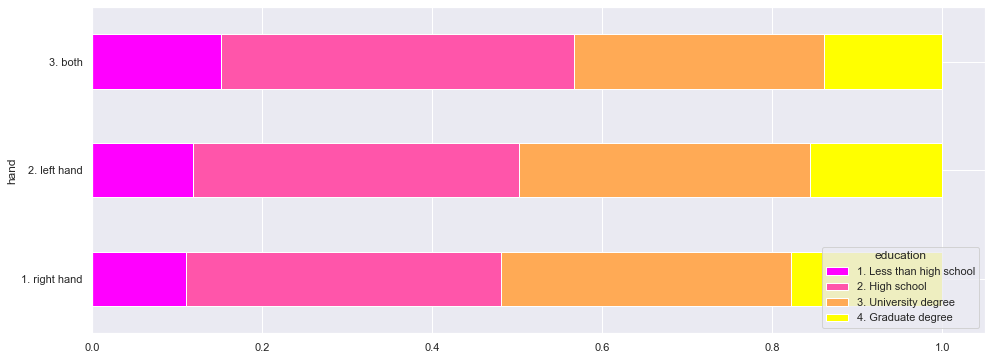

In [19]:
hand_edu.plot(kind='barh', stacked=True, figsize=[16,6], colormap='spring')

In [20]:
hand_edu_n=data.groupby(['hand'])['education'].value_counts().unstack()
hand_edu_n

education,1. Less than high school,2. High school,3. University degree,4. Graduate degree
hand,,,,
1. right hand,5398,18197,16700,8747
2. left hand,698,2254,2006,915
3. both,303,829,586,279


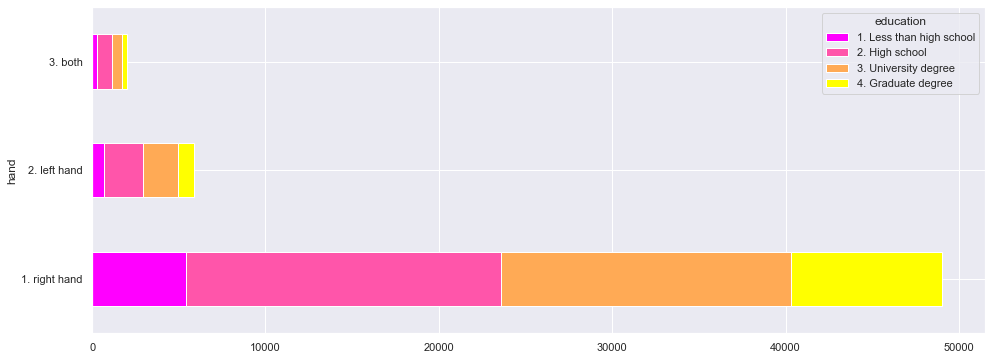

In [21]:
hand_edu_n.plot(kind='barh', stacked=True, figsize=[16,6], colormap='spring')

3 양손잡이로 갈수록 교육 수준이 1 오른손잡이, 2 왼손잡이 들보다 낮은쪽에 분포를 많이한다. 

-> 양손잡이들은 교육보다 예술쪽을 많이 하지 않을까?

In [22]:
df=train.groupby(['race','religion'])['voted'].value_counts().unstack()
df

voted                          1       2
race  religion                          
Arab  Agnostic              27.0    32.0
      Atheist               11.0    42.0
      Buddhist               2.0     1.0
      Christian_Catholic     5.0    12.0
      Christian_Mormon       1.0     1.0
...                          ...     ...
White Hindu                 11.0     8.0
      Jewish               240.0   189.0
      Muslim                30.0    65.0
      Other               1500.0  1555.0
      Sikh                   4.0     1.0

[81 rows x 2 columns]

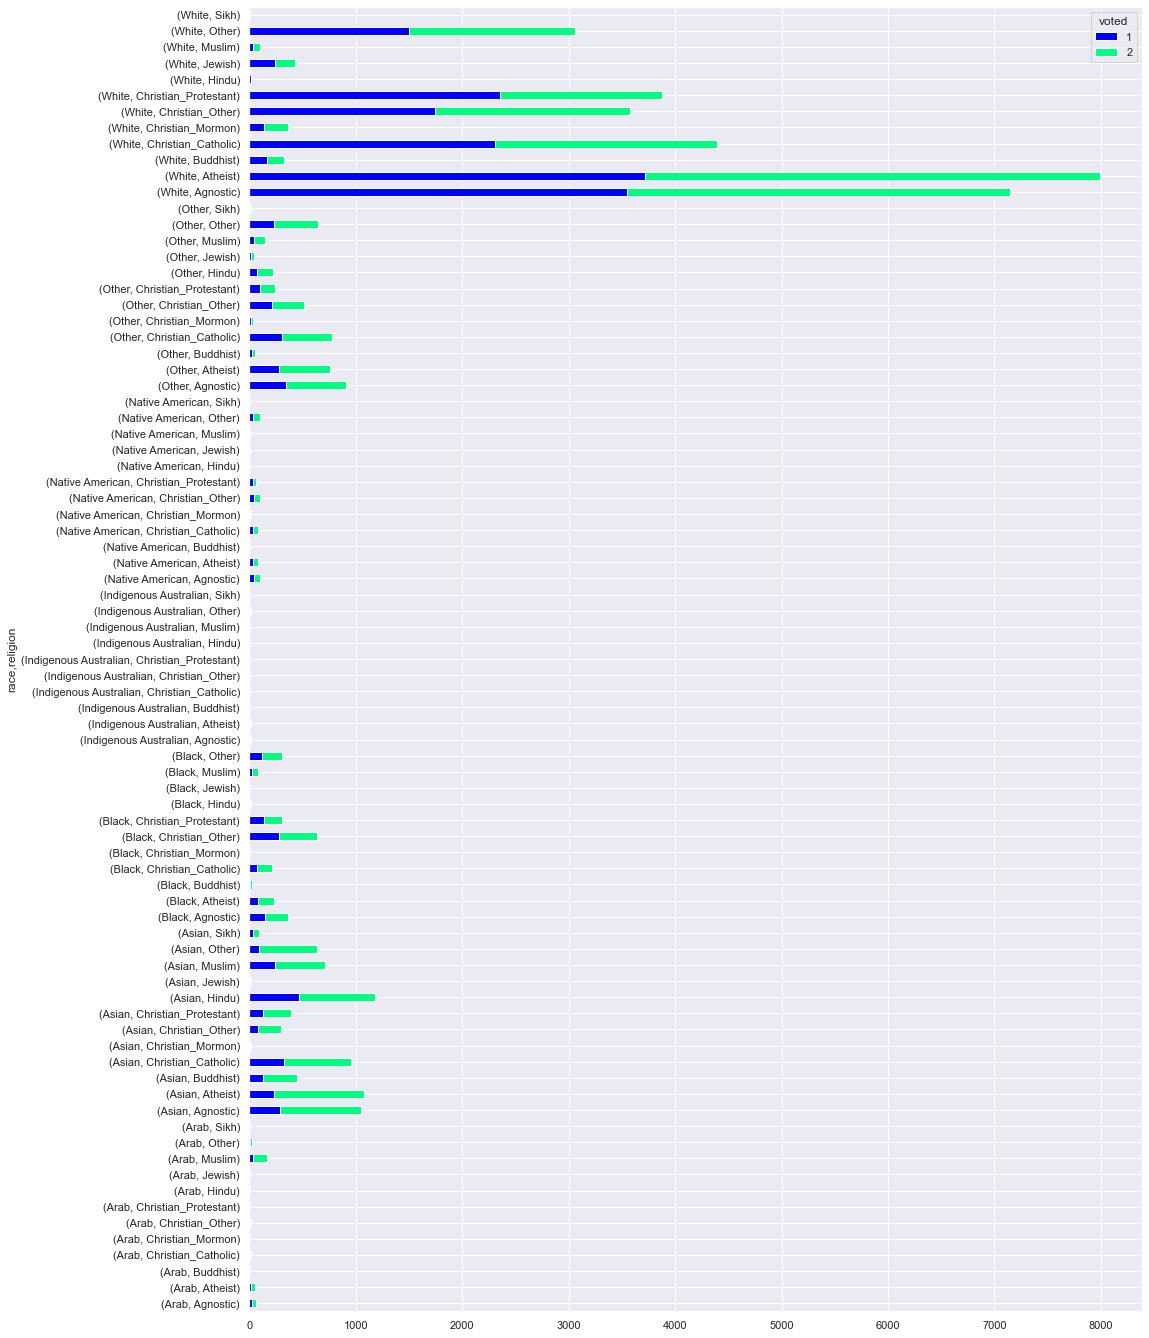

In [23]:
df.plot(kind='barh', stacked=True, figsize=[16,24], colormap='winter')

In [24]:
df.to_csv("race_religion.csv")